In [ ]:
import sklearn
from sklearn import datasets
from sklearn import neighbors #K Nearest Neighbors
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.model_selection import  train_test_split
import LoadData as ld

In [4]:
filename = "bill_authentication.csv"
cols = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
(x_train, y_train, x_test, y_test) = ld.LoadData(filename, cols)


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1097, 4), (1097, 1), (275, 4), (275, 1))

In [6]:
uniform_kdtree= []
uniform_balltree= []
uniform_brute= []
# k, distance = uniform/weighter, algorithm = kd_tree/ball_tree/brute, and numleaves
for k in range(1,20):
    mod = neighbors.KNeighborsClassifier(n_neighbors=k, weights="uniform", n_jobs=1 , algorithm='brute')
    mod.fit(x_train, y_train.ravel())
    y_pred = mod.predict(x_test)
    uniform_brute.append(accuracy_score(y_pred, y_test))
    mod = neighbors.KNeighborsClassifier(n_neighbors=k, weights="uniform", n_jobs=1 , algorithm='kd_tree')
    mod.fit(x_train, y_train.ravel())
    y_pred = mod.predict(x_test)
    uniform_kdtree.append(accuracy_score(y_pred, y_test))
    mod = neighbors.KNeighborsClassifier(n_neighbors=k, weights="uniform", n_jobs=1 , algorithm='ball_tree')
    mod.fit(x_train, y_train.ravel())
    y_pred = mod.predict(x_test)
    uniform_balltree.append(accuracy_score(y_pred, y_test))

In [7]:
distance_kdtree= []
distance_balltree= []
distance_brute= []
# k, distance = uniform/weighter, algorithm = kd_tree/ball_tree/brute, and numleaves
for k in range(1,20):
    mod = neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance", n_jobs=1 , algorithm='brute')
    mod.fit(x_train, y_train.ravel())
    y_pred = mod.predict(x_test)
    distance_brute.append(accuracy_score(y_pred, y_test))
    mod = neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance", n_jobs=1 , algorithm='kd_tree')
    mod.fit(x_train, y_train.ravel())
    y_pred = mod.predict(x_test)
    distance_kdtree.append(accuracy_score(y_pred, y_test))
    mod = neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance", n_jobs=1 , algorithm='ball_tree')
    mod.fit(x_train, y_train.ravel())
    y_pred = mod.predict(x_test)
    distance_balltree.append(accuracy_score(y_pred, y_test))

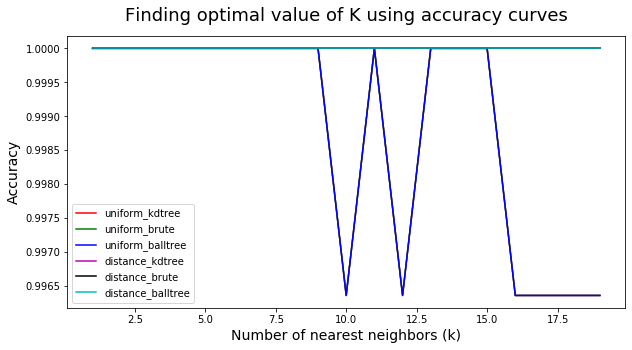

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), uniform_kdtree, color='r', label="uniform_kdtree")
plt.plot(range(1, 20), uniform_brute, color='g', label="uniform_brute")
plt.plot(range(1, 20), uniform_balltree, color='b', label="uniform_balltree")
plt.plot(range(1, 20), distance_kdtree, color='m', label="distance_kdtree")
plt.plot(range(1, 20), distance_brute, color='k', label="distance_brute")
plt.plot(range(1, 20), distance_balltree, color='c', label="distance_balltree")
plt.xlabel('Number of nearest neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Finding optimal value of K using accuracy curves', fontsize=18, pad=15)
plt.legend()
plt.show()